<a href="https://colab.research.google.com/github/soujanya-vattikolla/ML-Basics-Definitions/blob/main/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest Algorithm

**Exercise**

Using iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

1. Measure prediction score using default n_estimators (10)
2. Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [40]:
# import required libraries
import pandas as pd
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [41]:
# columns present in iris dataset
dir(iris_dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [42]:
# creating a dataframe
iris_df = pd.DataFrame(iris_dataset.data,columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
iris_df['target'] = iris_dataset['target']
iris_df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

Values 0 means Iris Setosa, 1 means Iris Versicolor and 2 is Iris Virginica

In [44]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X = iris_df.drop('target',axis='columns')
y = iris_df['target']

In [46]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [48]:
# splitting data into training and testing data
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=10)
print(X_train.shape)
print(y_train.shape)

(140, 4)
(140,)


In [50]:
# import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
random_model = RandomForestClassifier()

In [51]:
random_model.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
random_model.score(X_test,y_test)

0.9

In [53]:
# trying with n_estimators 10
# n_estimators is the number of random trees
model_estimator = RandomForestClassifier(n_estimators=10)
model_estimator.fit(X_train,y_train)
model_estimator.score(X_test,y_test)

0.9

We can observe that by default n_estimators is 100 and for n_estimators is 10, the accuracy is same 90%

In [53]:
# Confusion matrix

In [54]:
y_predicted = random_model.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test,y_predicted)

In [56]:
confmat

array([[1, 0, 0],
       [0, 5, 1],
       [0, 0, 3]])

Text(69.0, 0.5, 'Truth')

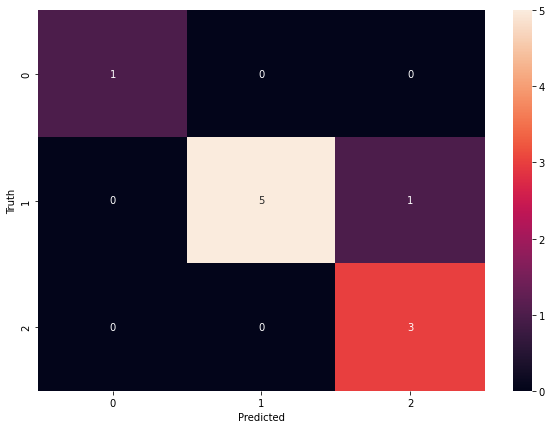

In [58]:
# plotting a heatmap

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(confmat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')